# Fourierov red

## Teorem o konvergenciji 

Neka je $f$ po djelovima glatka periodična funkcija s periodom $T=x_1-x_0$ koja na intervalu $[x_0,x_1]$ zadovoljava __Dirichletove uvjete:__

* $f$ je po djelovima neprekidna i njezini prekidi su prve vrste
* $f$ je ili monotona ili ima konačno strogih ekstrema 

Tada Fourierov red
$$
S(x)=\frac{a_0}{2}+\sum_{n=1}^\infty a_n \cos \frac{2 n \pi}{T}x + b_n \sin \frac{2 n \pi}{T}x,
$$
gdje je
$$
a_0=\frac{2}{T} \int_{x_0}^{x_1} f(x) \, dx, \\
a_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \cos \frac{2 n \pi}{T}x \,dx,\\
b_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \sin \frac{2 n \pi}{T}x \,dx,
$$
konvergira u svakoj točki $x\in [x_0,x_1]$ i vrijedi 
$$
S(x)=\begin{cases}
     f(x), \textrm{ ako je } f \textrm{ neprekidna u točki } x,\\
     \frac{1}{2} [f(x-0)+f(x+0)], \textrm{ inače.}
     \end{cases}
     $$

## Simboličko računanje 
`SymPy` je paket za simboličko računanje preuzet iz `Python`-a, a `Plots` je jedan od paketa za crtanje.

In [1]:
using SymPy
using Plots

┌ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1260


Definirajmo simboličku varijablu $x$, simboličku cjelobrojnu (integer) varijablu $n$, i granice intervala $x_0$ i $x_1$. 

In [2]:
x=symbols("x",real=true)
n=symbols("n",integer=true)
x₀=symbols("x₀")
x₁=symbols("x₁")
T=symbols("T")

T

### Definiranje koeficijenata

In [7]:
a(n)=2*integrate(f(x)*cos(2*PI*n*x/T),(x,x₀,x₁))/T
b(n)=2*integrate(f(x)*sin(2*PI*n*x/T),(x,x₀,x₁))/T

b (generic function with 1 method)

### Zadavanje funkcije $f(x)$ i granica intervala $[x_0,x_1]$

Potrebno je koristiti predefiniranu simboličku varijablu `PI` za razliku od varijabli `pi` ili $\pi$
kojima je definirana `Float64` vrijednost.

In [5]:
PI

π

In [25]:
f(x)=x
x₀=-PI
x₁=PI
T=x₁-x₀

2⋅π

In [10]:
a(1)

0

In [11]:
[a(n) for n=0:5]

6-element Array{Sym,1}:
 0
 0
 0
 0
 0
 0

In [12]:
[b(n) for n=0:5]

6-element Array{Sym,1}:
    0
    2
   -1
  2/3
 -1/2
  2/5

### Računanje i crtanje sume
Trebaju nam i numeričke granice.

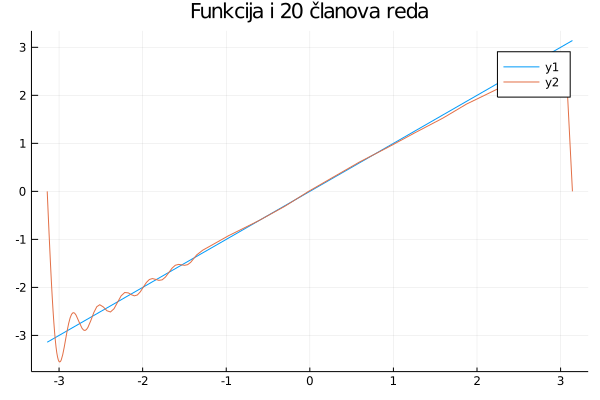

In [15]:
x0=Float64(x₀)
x1=Float64(x₁)
K=20
S=a(0)/2+sum([a(n)*cos(2*PI*n*x/T)+b(n)*sin(2*PI*n*x/T) for n=1:K])
g(x)=S(x)
title="Funkcija i "*string(K)*" članova reda"
plot(f,x0,x1)
plot!(g,x0,x1,title=title)

In [16]:
S

                      2⋅sin(3⋅x)   sin(4⋅x)   2⋅sin(5⋅x)   sin(6⋅x)   2⋅sin(7⋅
2⋅sin(x) - sin(2⋅x) + ────────── - ──────── + ────────── - ──────── + ────────
                          3           2           5           3           7   

x)   sin(8⋅x)   2⋅sin(9⋅x)   sin(10⋅x)   2⋅sin(11⋅x)   sin(12⋅x)   2⋅sin(13⋅x)
── - ──────── + ────────── - ───────── + ─────────── - ───────── + ───────────
        4           9            5            11           6            13    

   sin(14⋅x)   2⋅sin(15⋅x)   sin(16⋅x)   2⋅sin(17⋅x)   sin(18⋅x)   2⋅sin(19⋅x)
 - ───────── + ─────────── - ───────── + ─────────── - ───────── + ───────────
       7            15           8            17           9            19    

   sin(20⋅x)
 - ─────────
       10   

## Korištenje funkcije `fourier_series()`

Prvo pogledajmo simboličko računanje razvoja u Taylor-ov red.

In [17]:
G₁=series(sin(x),x,0,7)

     3     5        
    x     x     ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [18]:
G₂=series(cos(x),x,0,7)

     2    4     6        
    x    x     x     ⎛ 7⎞
1 - ── + ── - ─── + O⎝x ⎠
    2    24   720        

In [19]:
G₃=simplify(G₁*G₂)

       3      5        
    2⋅x    2⋅x     ⎛ 7⎞
x - ──── + ──── + O⎝x ⎠
     3      15         

In [20]:
G₃.removeO()

   5      3    
2⋅x    2⋅x     
──── - ──── + x
 15     3      

Sada razvoj u Fourier-ov red

In [21]:
# Ovo učitava funkcije za Fourierovu analizu i Laplaceovu transformaciju
import_from(sympy)

In [26]:
c=fourier_series(x^2,(x,x₀,x₁))

                        2    
                       π     
-4⋅cos(x) + cos(2⋅x) + ── + …
                       3     

In [27]:
# Prvih 10 harmonika
c₁=c.truncate(10)

                                                                              
                       4⋅cos(3⋅x)   cos(4⋅x)   4⋅cos(5⋅x)   cos(6⋅x)   4⋅cos(7
-4⋅cos(x) + cos(2⋅x) - ────────── + ──────── - ────────── + ──────── - ───────
                           9           4           25          9           49 

                               2
⋅x)   cos(8⋅x)   4⋅cos(9⋅x)   π 
─── + ──────── - ────────── + ──
         16          81       3 

In [28]:
# Numerička vrijednost u točki x=1
Float64(c₁(1))

1.0247547650708126

### Računanje aproksimacije i crtanje

In [29]:
X = range(x0,x1,length=100)
css=[Float64(c₁(x)) for x in X]

100-element Array{Float64,1}:
 9.448939058362615
 9.377200212742677
 9.170904135704877
 8.854932757403411
 8.464960518690962
 8.040276907029902
 7.616347739550003
 7.218862857043369
 6.860562867586582
 6.541363474264308
 6.251423983812782
 5.976078186725812
 5.701153263614476
 ⋮
 5.976078186725812
 6.251423983812782
 6.541363474264308
 6.860562867586582
 7.218862857043369
 7.616347739550003
 8.040276907029902
 8.464960518690962
 8.854932757403411
 9.170904135704877
 9.377200212742677
 9.448939058362615

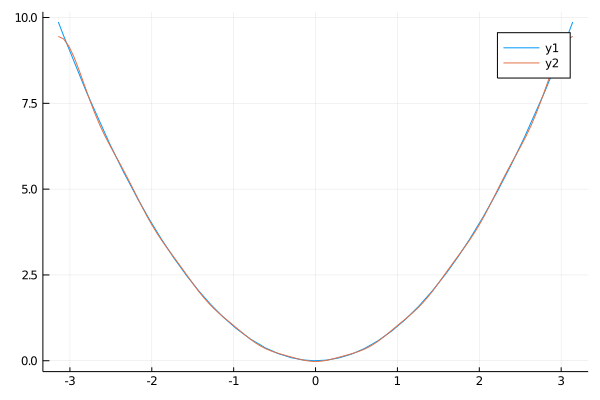

In [30]:
plot(x->x^2,x0,x1)
plot!(X,css)

### Interaktivno računanje i crtanje

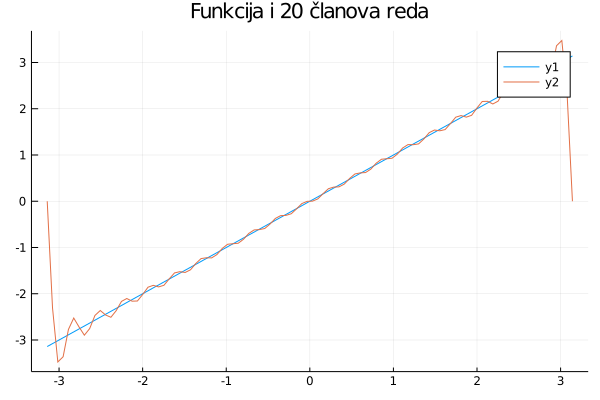

In [31]:
f₁=x
K=20
cs=fourier_series(f₁,(x,x₀,x₁)).truncate(K)
css=[Float64(cs(x)) for x in X]
title="Funkcija i "*string(K)*" članova reda"
plot(f,x0,x1)
plot!(X,css,title=title)

## Numerička integracija
Fourierove koeficijente čemo izračunati _numeričkom integracijom_ (vidi [Numeričko integriranje](http://www.fesb.hr/mat2/)) koristeći Julia naredbu [quadgk](http://docs.julialang.org/en/latest/stdlib/math/?highlight=quadgk#Base.quadgk).

Ovaj dio je izrađen prema bilježnici [lecture-2.ipynb](http://nbviewer.ipython.org/url/math.mit.edu/~stevenj/18.303/lecture-2.ipynb) [Stevena Johnsona](http://math.mit.edu/~stevenj/) izrađenoj za predmet [18.303](http://math.mit.edu/~stevenj/18.303/).

Definirajmo funkcije `sinecoef` i `coscoef` koje numerički računaju koeficijente. Parametar `abstol` je toleranca numeričke integracije: želimo da je greška mala u odnosu na $\sqrt{\int_{x_0}^{x_1} |f(x)|^2 dx}$.

In [32]:
using QuadGK

┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1260


In [34]:
?quadgk

search: quadgk QuadGK



```
quadgk(f, a,b,c...; rtol=sqrt(eps), atol=0, maxevals=10^7, order=7, norm=norm)
```

Numerically integrate the function `f(x)` from `a` to `b`, and optionally over additional intervals `b` to `c` and so on. Keyword options include a relative error tolerance `rtol` (if `atol==0`, defaults to `sqrt(eps)` in the precision of the endpoints), an absolute error tolerance `atol` (defaults to 0), a maximum number of function evaluations `maxevals` (defaults to `10^7`), and the `order` of the integration rule (defaults to 7).

Returns a pair `(I,E)` of the estimated integral `I` and an estimated upper bound on the absolute error `E`. If `maxevals` is not exceeded then `E <= max(atol, rtol*norm(I))` will hold. (Note that it is useful to specify a positive `atol` in cases where `norm(I)` may be zero.)

The endpoints `a` et cetera can also be complex (in which case the integral is performed over straight-line segments in the complex plane). If the endpoints are `BigFloat`, then the integration will be performed in `BigFloat` precision as well.

!!! note
    It is advisable to increase the integration `order` in rough proportion to the precision, for smooth integrands.


More generally, the precision is set by the precision of the integration endpoints (promoted to floating-point types).

The integrand `f(x)` can return any numeric scalar, vector, or matrix type, or in fact any type supporting `+`, `-`, multiplication by real values, and a `norm` (i.e., any normed vector space). Alternatively, a different norm can be specified by passing a `norm`-like function as the `norm` keyword argument (which defaults to `norm`).

!!! note
    Only one-dimensional integrals are provided by this function. For multi-dimensional integration (cubature), there are many different algorithms (often much better than simple nested 1d integrals) and the optimal choice tends to be very problem-dependent. See the Julia external-package listing for available algorithms for multidimensional integration or other specialized tasks (such as integrals of highly oscillatory or singular functions).


The algorithm is an adaptive Gauss-Kronrod integration technique: the integral in each interval is estimated using a Kronrod rule (`2*order+1` points) and the error is estimated using an embedded Gauss rule (`order` points). The interval with the largest error is then subdivided into two intervals and the process is repeated until the desired error tolerance is achieved.

These quadrature rules work best for smooth functions within each interval, so if your function has a known discontinuity or other singularity, it is best to subdivide your interval to put the singularity at an endpoint. For example, if `f` has a discontinuity at `x=0.7` and you want to integrate from 0 to 1, you should use `quadgk(f, 0,0.7,1)` to subdivide the interval at the point of discontinuity. The integrand is never evaluated exactly at the endpoints of the intervals, so it is possible to integrate functions that diverge at the endpoints as long as the singularity is integrable (for example, a `log(x)` or `1/sqrt(x)` singularity).

For real-valued endpoints, the starting and/or ending points may be infinite. (A coordinate transformation is performed internally to map the infinite interval to a finite one.)


In [33]:
Tf=Float64(T)
sinecoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * sin(2*m*π*x/Tf)/Tf, x0,x1)[1]
coscoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * cos(2*m*π*x/Tf)/Tf, x0,x1)[1]

# i druga funkcija koja računa na vektoru prirodnih brojeva
sinecoef(f, M::AbstractVector,x0,x1,Tf) = Float64[sinecoef(f,m,x0,x1,Tf) for m in M]
coscoef(f, M::AbstractVector,x0,x1,Tf) = Float64[coscoef(f,m,x0,x1,Tf) for m in M]

coscoef (generic function with 2 methods)

In [35]:
# First, define a function to evaluate N terms of the sine series, given the coefficients b
function fouriersum(a, b, x, T)
    f = a[1]/2
    for n = 1:length(b)
        f += a[n+1]* cos(2*n*π*x/T) + b[n] * sin(2*n*π*x/T)
    end
    return f
end
fouriersum(a, b, X::AbstractVector, T) = Float64[fouriersum(a, b,x,T) for x in X]

fouriersum (generic function with 2 methods)

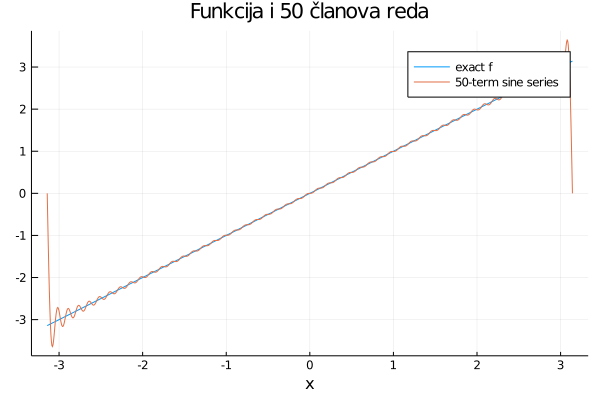

In [36]:
# Uzmimo više točaka (inače "nestane" Gibbsov efekt!!)
X=range(x0,x1,length=1000)
# try for n=1:2:99
n=50
an = coscoef(f, 0:n, x0, x1, Tf)
bn = sinecoef(f, 1:n, x0, x1, Tf)
xlabel="x"
title="Funkcija i "*string(n)*" članova reda"
plot(f,x0,x1,lab="exact f")
plot!(X, fouriersum(an, bn, X, Tf),lab="$n-term sine series",
    xlabel=xlabel,title=title)

## Primjeri

In [37]:
f(x)=x^2
x₀=-1
x₁=1
T=x₁-x₀

2

In [38]:
a(3)

-4  
────
   2
9⋅π 

In [39]:
f(x)

 2
x 

In [40]:
a(n)

  1   
──────
     2
625⋅π 

In [41]:
b(2)

0

In [42]:
f(2)

4

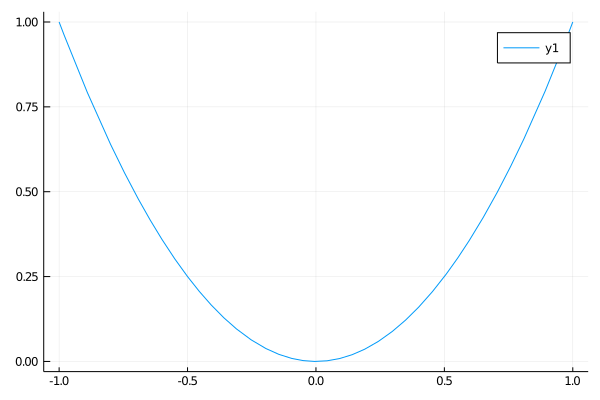

In [43]:
plot(f,x₀,x₁)

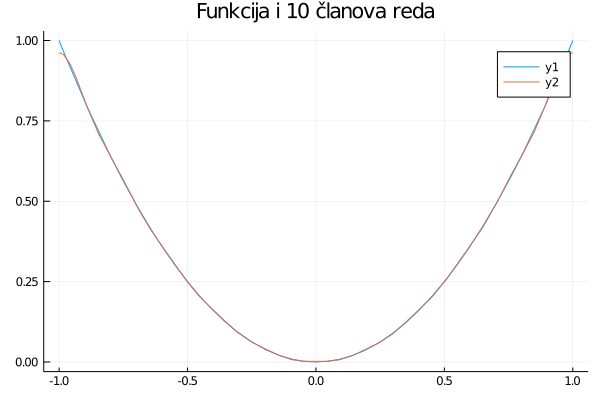

In [44]:
x0=Float64(x₀)
x1=Float64(x₁)
# Try for N=1:10
N=10
S=a(0)/2+sum([a(n)*cos(2*PI*n*x/T)+b(n)*sin(2*PI*n*x/T) for n=1:N])
g(x)=S(x)
title="Funkcija i "*string(N)*" članova reda"
plot(f(x),x₀,x₁)
plot!(g,x₀,x₁,title=title)

In [45]:
S

  4⋅cos(π⋅x)   cos(2⋅π⋅x)   4⋅cos(3⋅π⋅x)   cos(4⋅π⋅x)   4⋅cos(5⋅π⋅x)   cos(6⋅π
- ────────── + ────────── - ──────────── + ────────── - ──────────── + ───────
       2            2              2             2             2             2
      π            π            9⋅π           4⋅π          25⋅π           9⋅π 

⋅x)   4⋅cos(7⋅π⋅x)   cos(8⋅π⋅x)   4⋅cos(9⋅π⋅x)   cos(10⋅π⋅x)   1
─── - ──────────── + ────────── - ──────────── + ─────────── + ─
             2             2             2              2      3
         49⋅π          16⋅π          81⋅π           25⋅π        

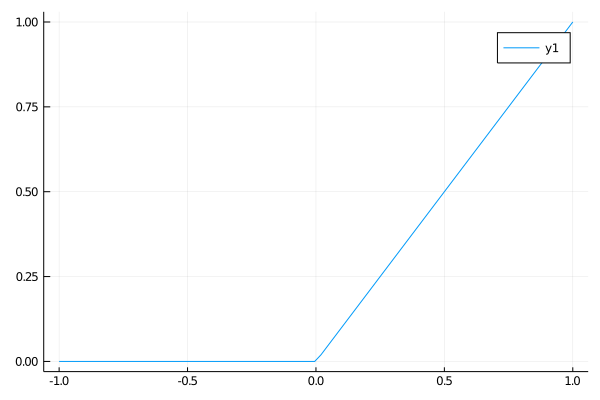

In [47]:
# Po dijelovima definirana funkcija
# f(x)=x<0 ? 0 : x
# f(x)=sympy.Piecewise((0,x<=0),(x,x>0))
f(x)=x*Heaviside(x)
plot(f(x),x₀,x₁)

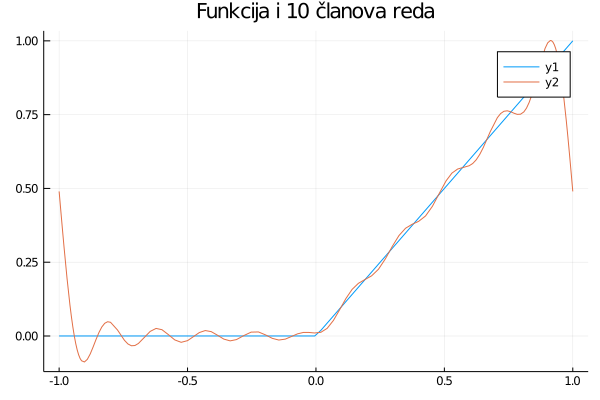

In [48]:
# Try for N=1:10
N=10
S=a(0)/2+sum([a(n)*cos(2*PI*n*x/T)+b(n)*sin(2*PI*n*x/T) for n=1:N])
g(x)=S(x)
title="Funkcija i "*string(N)*" članova reda"
plot(f(x),x₀,x₁)
plot!(g,x₀,x₁,title=title)

In [36]:
S

sin(π⋅x)   sin(2⋅π⋅x)   sin(3⋅π⋅x)   sin(4⋅π⋅x)   sin(5⋅π⋅x)   sin(6⋅π⋅x)   si
──────── - ────────── + ────────── - ────────── + ────────── - ────────── + ──
   π          2⋅π          3⋅π          4⋅π          5⋅π          6⋅π         
                                                                              

n(7⋅π⋅x)   sin(8⋅π⋅x)   sin(9⋅π⋅x)   sin(10⋅π⋅x)   2⋅cos(π⋅x)   2⋅cos(3⋅π⋅x)  
──────── - ────────── + ────────── - ─────────── - ────────── - ──────────── -
 7⋅π          8⋅π          9⋅π           10⋅π           2              2      
                                                       π            9⋅π       

 2⋅cos(5⋅π⋅x)   2⋅cos(7⋅π⋅x)   2⋅cos(9⋅π⋅x)   1
 ──────────── - ──────────── - ──────────── + ─
        2              2              2       4
    25⋅π           49⋅π           81⋅π         